# problem6

This notebook is inspired by [this 3blue1brown video](https://www.youtube.com/watch?v=OkmNXy7er84&t=1s) which looks at question A6 on the [1992 Putnam](http://www.math.hawaii.edu/~dale/putnam/1992.pdf)

The question is 

>Four points are chosen independently and at random on the surface of a sphere (using the uniform distribution). What is the probability that the center of the sphere lies inside the resulting tetrahedron?

We will look first look at this question in 2-dimensions, that question

>Three points are chosen independently and at random on the surface of a circle. What is the probability that the center of the circle lies inside the resulting triangle?

## How to check if a point is enclosed in within a polygon?

We will use a generalized version of the method described [here](http://steve.hollasch.net/cgindex/geometry/ptintet.html)

This method extends to many dimensions but, described in two dimensions it looks like the following

Given a triangle's vertices and a point

$v1 = (x_1, y_1)$

$v2 = (x_2, y_2)$

$v3 = (x_3, y_3)$

$p = (x_p, y_p)$

The $p$ is contained within the triangle if the sign of the determinant of all of the following matrices are the same

$
D_0 = 
 \begin{pmatrix}
  x_1 & y_1 & 1 \\
  x_2 & y_2 & 1 \\
  x_3 & y_3 & 1
 \end{pmatrix}
$

$
D_1 = 
 \begin{pmatrix}
  x_p & y_p & 1 \\
  x_2 & y_2 & 1 \\
  x_3 & y_3 & 1
 \end{pmatrix}
$

$
D_3 = 
 \begin{pmatrix}
  x_1 & y_1 & 1 \\
  x_p & y_p & 1 \\
  x_3 & y_3 & 1
 \end{pmatrix}
$

$
D_2 = 
 \begin{pmatrix}
  x_1 & y_1 & 1 \\
  x_2 & y_2 & 1 \\
  x_p & y_p & 1
 \end{pmatrix}
$

In [1]:
from copy import deepcopy
from typing import List, Union

import numpy as np

def contains(point: np.array, vertices: List[np.array]):
    """Returns whether point is contained within given vertices

    Uses a generalized version of this method

    http://steve.hollasch.net/cgindex/geometry/ptintet.html
    """
    
    if len(point) + 1 != len(vertices):
        raise ValueError("Required that num vertices = dimension + 1")

    for vertex in vertices:
        if len(vertex) != len(point):
            raise ValueError("Dimension of point and vertices do not match")

    dimension = len(point)

    # generate a list of the matrices described above
    d0 = np.array([np.append(vertex, 1) for vertex in vertices])
    d_matrices = [d0]

    for i in range(0, dimension+1):
        temp_vertices = deepcopy(vertices)
        temp_vertices = [np.append(vertex, 1) for vertex in temp_vertices]
        temp_vertices[i] = np.append(point, 1)
        d_matrices.append(temp_vertices)

    # check that sign of all determinants are the same
    determinants = [np.linalg.det(matrix) for matrix in d_matrices]
    return all(np.sign(det) == np.sign(determinants[0]) for det in determinants)

In [2]:
p1 = np.array([0, 0])
p2 = np.array([1, 0])
p3 = np.array([0, 1])
vertices = [p1, p2, p3]

point = np.array([0.2, 0.2])

assert contains(point, vertices)

point = np.array([0.6, 0.6])
assert not contains(point, vertices)

## Start with 2D case

In [3]:
from collections import namedtuple

Point = namedtuple('Point', ['x', 'y'])

In [4]:
p = Point(1, 2)
print(isinstance(p, Point))

a = np.array([1, 2])
print(isinstance(a, np.ndarray))

True
True


In [5]:
import math

class Triangle:

    def __init__(
        self,
        p1: Union[Point, np.ndarray],
        p2: Union[Point, np.ndarray],
        p3: Union[Point, np.ndarray]
    ):

        if all([isinstance(p1, np.ndarray),
                isinstance(p2, np.ndarray),
                isinstance(p3, np.ndarray)]):
            self.p1 = p1
            self.p2 = p2
            self.p3 = p3

        elif all([isinstance(p1, Point),
                  isinstance(p2, Point),
                  isinstance(p3, Point)]):

            self.p1 = np.array([p1.x, p1.y])
            self.p2 = np.array([p2.x, p2.y])
            self.p3 = np.array([p3.x, p3.y])

        else:
            raise TypeError

    def __contains__(self, point: Union[Point, np.ndarray]) -> bool:
        if isinstance(point, np.ndarray):
            p = point
        elif isinstance(point, Point):
            p = np.array([point.x, point.y])
        else:
            raise TypeError
        return contains(p, [self.p1, self.p2, self.p3])

In [6]:
p1 = Point(0, 0)
p2 = Point(1, 0)
p3 = Point(0, 1)

assert Point(0.2, 0.2) in Triangle(p1, p2 , p3)
assert Point(0.6, 0.6) not in Triangle(p1, p2 , p3)

p2 = Point(-1, 0)
p3 = Point(0, -1)
assert Point(-0.2, -0.2) in Triangle(p1, p2 , p3)
assert Point(-0.2, 0.2) not in Triangle(p1, p2 , p3)

## Generate 3 random points on unit circle

Generate 3 random x between -1 and 1, then pick from 1 of 2 possible Y values

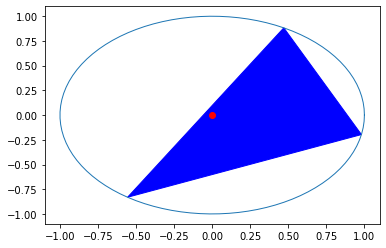

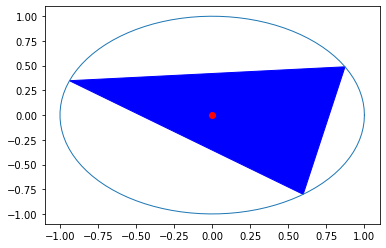

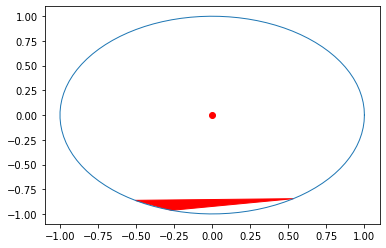

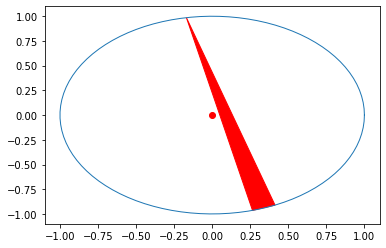

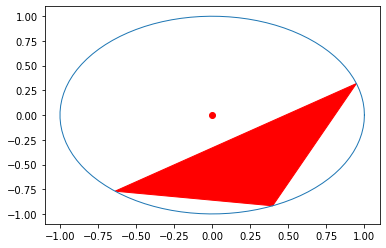

In [7]:
%matplotlib inline

import random
import time

import numpy as np
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

origin = Point(0, 0)

for _ in range(5):
    x1 = random.uniform(-1, 1)
    y1 = math.sqrt(1 - x1**2) * random.choice([-1, 1])
    x2 = random.uniform(-1, 1)
    y2 = math.sqrt(1 - x2**2) * random.choice([-1, 1])
    x3 = random.uniform(-1, 1)
    y3 = math.sqrt(1 - x3**2) * random.choice([-1, 1])

    p1 = Point(x1, y1)
    p2 = Point(x2, y2)
    p3 = Point(x3, y3)

    t = np.linspace(0, np.pi*2,100)
    plt.plot(np.cos(t), np.sin(t), linewidth=1)
    plt.plot(origin.x, origin.y, 'ro')

    color = 'blue' if origin in Triangle(p1, p2, p3) else 'red'

    t1 = plt.Polygon([[p1.x, p1.y], [p2.x, p2.y], [p3.x, p3.y]], color=color)
    plt.gca().add_patch(t1)
    plt.show()

In [8]:
from itertools import repeat

origin = Point(0, 0)

num_runs = 10**5
times_origin_in_triangle = 0

for _ in repeat(None, num_runs):
    x1 = random.uniform(-1, 1)
    y1 = math.sqrt(1 - x1**2) * random.choice([-1, 1])
    x2 = random.uniform(-1, 1)
    y2 = math.sqrt(1 - x2**2) * random.choice([-1, 1])
    x3 = random.uniform(-1, 1)
    y3 = math.sqrt(1 - x3**2) * random.choice([-1, 1])

    p1 = Point(x1, y1)
    p2 = Point(x2, y2)
    p3 = Point(x3, y3)

    t = Triangle(p1, p2, p3)
    times_origin_in_triangle += origin in t

In [9]:
print(f"Origin is contained within randomly "
      "generated triangle on the unit circle "
      f"{100 * times_origin_in_triangle / num_runs} "
      f"percent of the time")

Origin is contained within randomly generated triangle on the unit circle 25.035 percent of the time


### 3D Case

In [10]:
Point = namedtuple('Point', ['x', 'y', 'z'])

In [11]:
class Tetrahedron:

    def __init__(
        self,
        p1: Union[Point, np.ndarray],
        p2: Union[Point, np.ndarray],
        p3: Union[Point, np.ndarray],
        p4: Union[Point, np.ndarray]
    ):
        if all([isinstance(p1, np.ndarray),
                isinstance(p2, np.ndarray),
                isinstance(p3, np.ndarray),
                isinstance(p3, np.ndarray)]):
            self.p1 = p1
            self.p2 = p2
            self.p3 = p3
            self.p4 = p4

        elif all([isinstance(p1, Point),
                  isinstance(p2, Point),
                  isinstance(p3, Point),
                  isinstance(p4, Point)]):
            self.p1 = np.array([p1.x, p1.y, p1.z])
            self.p2 = np.array([p2.x, p2.y, p2.z])
            self.p3 = np.array([p3.x, p3.y, p3.z])
            self.p4 = np.array([p4.x, p4.y, p4.z])

    def __contains__(self, point: Point) -> bool:
        """Returns whether point is contained within tetrahedron"""
        p = np.array([point.x, point.y])
        return contains(point, [self.p1, self.p2, self.p3, self.p4])

In [12]:
p1 = Point(0, 0, 0)
p2 = Point(1, 0, 0)
p3 = Point(0, 1, 0)
p4 = Point(0, 0, 1)
t = Tetrahedron(p1, p2, p3, p4)
assert Point(0.01, 0.01, 0.01) in t
assert Point(0.5, 0.5, 0.5) not in t

In [13]:
origin = Point(0.01, 0.01, 0.01)

points = []
for _ in range(4):
    # generate random point on unit sphere
    vec = np.random.randn(3, 1)
    vec /= np.linalg.norm(vec, axis=0)
    points.append(Point(vec[0][0], vec[1][0], vec[2][0]))

t = Tetrahedron(points[0], points[1], points[2], points[3])

In [14]:
num_runs = 10**5
num_times_origin_contained = 0

for _ in repeat(None, num_runs):
    points = []
    for _ in range(4):
        # generate random point on unit sphere
        vec = np.random.randn(3, 1)
        vec /= np.linalg.norm(vec, axis=0)
        points.append(Point(vec[0][0], vec[1][0], vec[2][0]))

    t = Tetrahedron(points[0], points[1], points[2], points[3])
    num_times_origin_contained += origin in t

In [15]:
print(f"Origin is contained within randomly generated "
      f"tetrahedron on the unit sphere "
      f"{100 * num_times_origin_contained / num_runs} "
      f"percent of the time")

Origin is contained within randomly generated tetrahedron on the unit sphere 12.597 percent of the time
